# 使用Matplotlib绘制进阶图形

### 1. 绘制散点图

1.1 散点图（Scatter Diagram）又称为散点分布图，是以一个特征为横坐标，以另一个特征为纵坐标，利用坐标点（散点）的分布形态反映特征间的统计关系的一种图形。   

1.2 散点图可以提供两类关键信息，具体内容如下：

    特征之间是否存在数值或数量的关联趋势，关联趋势是线性的还是非线性的。

    如果某一个点或某几个点偏离大多数点，那么这些点就是离群值，通过散点图可以一目了然，从而可以进一步分析这些离群值是否在建模分析中产生较大的影响。

1.3 使用场景
散点图是一种常用的数据可视化方式，适用于以下场景：

探索数据分布：散点图可以展示两个变量之间的关系，帮助我们了解数据的分布情况。通过观察数据点的分布模式，可以发现是否存在聚类、线性关系、非线性关系等。

发现异常值：散点图可以帮助我们发现数据中的异常值。异常值通常是与其他数据点明显偏离的点，通过散点图可以直观地发现这些异常值。

比较不同组别或类别：散点图可以用于比较不同组别或类别之间的差异。通过将不同组别或类别的数据点用不同的颜色或标记符号表示，可以直观地观察它们在空间上的分布情况。

可视化多变量关系：散点图可以同时展示多个变量之间的关系。通过利用不同的轴来表示不同的变量，我们可以在同一图表中展示多个变量之间的关联程度。

数据建模和预测：散点图可以用于数据建模和预测。通过观察散点图中的趋势和模式，可以帮助我们选择合适的模型，并进行数据预测和决策。

总之，散点图是一种简单直观的数据可视化工具，适用于多种场景，帮助我们理解数据、发现模式和异常，并进行数据分析和决策。

![本地路径](.\\pic\\2.png "相对路径演示,下一级目录")

***


.npz 文件通常包含多个numpy数组，每个数组都有一个名字。可以使用Numpy库中的load()函数读取.npz文件，并使用键名来访问其中的数组。.npz文件适合存储多个数组，并且可以保留Numpy数组的数据类型、结构和形状等信息。

In [1]:
import numpy as np
import pandas as pd
data = np.load('./data/2001-2019年劳动力与就业人员数据.npz',
    encoding='ASCII', allow_pickle=True)
# 获取.npz文件中的数组名字
array_names = data.files

# 遍历每个数组并将其保存为.csv文件
for name in array_names:
    array_data = data[name]
    df = pd.DataFrame(array_data)
    df.to_csv(f'./tmp/{name}.csv', index=False)

文件的详细内容见arr_0.csv和arr_1.csv

In [6]:
# 代码5-5
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
data = np.load('./data/2001-2019年劳动力与就业人员数据.npz',
    encoding='ASCII', allow_pickle=True)
columns = data['arr_0']  # 提取其中的columns数组，视为数据的标签
values = data['arr_1']  # 提取其中的values数组，视为数据的存在位置
plt.figure(figsize=(12, 6), dpi=1080)  # 设置画布
plt.scatter(values[:, 0], values[:, 1], marker='o')  # 绘制散点图
plt.xlabel('年份（年）')
plt.ylabel('劳动力人数（万人）')
plt.ylim(70000, 85000)  # 设置y轴范围
plt.xticks(range(2001, 2020, 1), labels=values[:, 0])
plt.title('2001～2019年劳动力人数散点图')  # 添加图表标题
plt.show()

In [2]:
# 代码5-6
p = plt.figure(figsize=(12, 6), dpi=1080)  # 设置画布
# 绘制散点图1
plt.scatter(values[:, 0], values[:, 3], marker='o', c='b')
# 绘制散点图2
plt.scatter(values[:, 0], values[:, 4], marker='o', c='r')
plt.xlabel('年份（年）')
plt.ylabel('人数（万人）')
plt.ylim(20000, 60000)  # 设置y轴范围
plt.xticks(range(2001, 2020, 1), labels=values[:, 0])
plt.legend(['城镇就业人员', '乡村就业人员'])  # 设置图例
plt.title('2001～2019年城乡就业人数散点图')  # 添加图表标题
plt.show()

作业：   
1.xy轴分别使用numpy中的np.random.rand(50) 会生成一个包含100个随机浮点数的NumPy数组，取值在0到1之间。

2.画散点图。

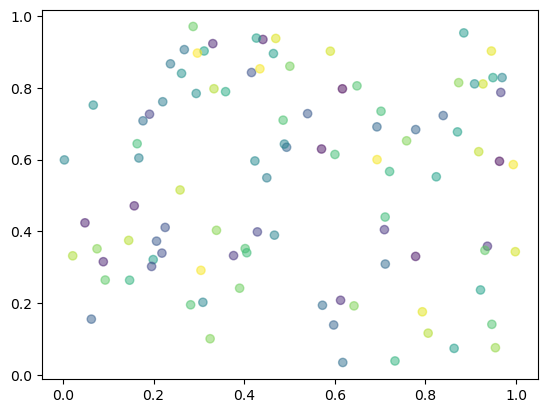

In [2]:
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.rand(100)

plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

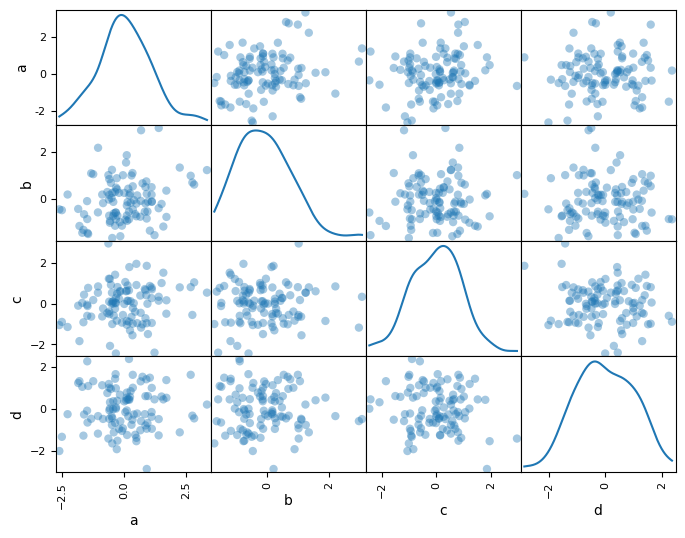

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(100, 4), columns = list('abcd'))
pd.plotting.scatter_matrix(df, figsize = (8,6), marker = 'o', diagonal = 'kde', alpha = 0.4, range_padding = 0.05)
plt.show()

### 2. 绘制折线图
折线图（Line Chart）是一种将数据点按照顺序连接起来的图形，可以看作是将散点图按照x轴坐标顺序连接起来的图形。
在pyplot中绘制折线图的函数为plot，plot函数的基本使用格式如下。

![本地路径](.\\pic\\3.png "相对路径演示,下一级目录")


In [3]:
# 代码5-5
import numpy as np
import matplotlib.pyplot as plt

data = np.load('./data/2001-2019年劳动力与就业人员数据.npz',
    encoding='ASCII', allow_pickle=True)
columns = data['arr_0']  # 提取其中的columns数组，视为数据的标签
values = data['arr_1']  # 提取其中的values数组，视为数据的存在位置

In [5]:

plt.rcParams['font.sans-serif'] = 'SimHei' 
plt.rcParams['axes.unicode_minus'] = False  # 设置正常显示符号
# 代码5-8
p = plt.figure(figsize=(12, 6), dpi=1080)  #设置画布
plt.plot(values[:, 0], values[:, 2], c='b', linestyle = '-', 
         marker = 'o')  # 绘制点线图
plt.xlabel('年份（年）')
plt.ylabel('人数（万人）')
plt.ylim(70000, 80000)  # 设置y轴范围
plt.xticks(range(2001, 2020, 1), labels=values[:, 0])
plt.title('2001～2019年就业人数点线图')
plt.show()